In [1]:
import copy
import pathlib
from typing import Optional, Set
import os.path
import math

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

In [3]:
from drmdp import dataproc

In [4]:
import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1746115037/1746166333/metrics/*.parquet")

In [6]:
df_metrics = dataproc.read_data(files, reader="pd")

In [7]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,710,1746115037-00b9abcd-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[102.02783073563408, 104.33277137208779, 301.7...","{'returns': {'mean': 160.70075962951634, 'std'...",IMR
1,710,1746115037-01241eab-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[141.96122545991437, 158.30323632080845, 160.0...","{'returns': {'mean': 138.1951380766256, 'std':...",DMR
2,710,1746115037-19ac5573-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[14.36361851327176, 14.135411317837095, 14.485...","{'returns': {'mean': 94.14181259366002, 'std':...",DMR
3,710,1746115037-18a93f64-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[373.72272162757696, 372.6428221199749, 368.10...","{'returns': {'mean': 371.2849843573612, 'std':...",IMR
4,710,1746115037-0a19b809-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[53.40493990335529, 50.018484348888315, 52.417...","{'returns': {'mean': 50.97578817325536, 'std':...",OP-S
...,...,...,...,...,...,...
6619,18350,1746115037-c693da3d-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.94479864857501, -15.733856465587706, -15....","{'returns': {'mean': -15.350051768296005, 'std...",IMR
6620,18350,1746115037-cc958b03-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.06353877172906, -13.963707699852868, -13....","{'returns': {'mean': -14.053504804461154, 'std...",L-TRACE-Bayes
6621,18350,1746115037-d1dd8368-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-33.336984360525314, -33.40777069369517, -33....","{'returns': {'mean': -33.382703939839786, 'std...",OP-A
6622,18350,1746115037-f1d39cc9-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-12.8272028772274, -12.672824369244182, -10.2...","{'returns': {'mean': -11.906962381704904, 'std...",OP-A


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1746115037-00b9abcd-Finite-SC-ShuntDc-v0',
 'instance_id': 9,
 'run_config': {'episodes_per_run': 1000,
  'log_episode_frequency': 10,
  'num_runs': 15,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/controljob/logs/1746115037/1746115037-00b9abcd-Finite-SC-ShuntDc-v0/run_9/zero-impute/f4cf45c3',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': 0.0,
   'max_episode_steps': 200.0,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': None, 'name': 'scale'},
  'name': 'Finite-SC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': {'args': {'delay': 8.0}, 'name': 'fixed'},
  'epsilon': 0.2,
  'gamma': 1.0,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': None, 'name': 'zero-impute'}},
 'reward_mapper': 'IMR',
 'policy_type': 'PP'}

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, args in envs.items():
    print(env_name, args)

Finite-SC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
GridWorld-v0 {'max_episode_steps': 200.0}
MountainCar-v0 {'max_episode_steps': 2500.0}
Finite-CC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
IceWorld-v0 None
RedGreen-v0 None


## Comparison: T-Test

In [11]:
PVALUE_THRESHOLD = 0.05

In [12]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)
    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc
    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [13]:
def max_episode_filter(df_input):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    env_name = env_spec.apply(lambda spec: spec["name"])
    envs = env_name.unique()
    dfs = []
    for env in envs:
        df_slice = df_input[
            (env_name == env)
        ]
        df_slice = df_slice[df_slice["episode"] == df_slice["episode"].max()]
        dfs.append(
            copy.deepcopy(df_slice)
        )
    return pd.concat(dfs)

In [14]:
def filter_envs(df_input, envs: Set[str]):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    mask = env_spec.apply(lambda spec: spec["name"] in envs)
    return copy.deepcopy(df_input[mask])    

In [15]:
def sample_stat_test_method_comparison(
    df_data, episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)
    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])
    
    df_result = parse_delay_config(df_result)

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }
    
    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    def mannwhitney_less_than_test(xs, ys):
        xs_stat, pvalue = stats.mannwhitneyu(xs, ys, alternative="less")
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Less than)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome

    def ztest(left_pos, left_neg, right_pos, right_neg):
        zstat, pvalue = proportion.proportions_ztest(
            count=left_pos, nobs=left_pos + left_neg, 
            value=right_pos / (right_pos + right_neg)
        )                
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Different)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome        
        
    rows = []
    keys = ["env_name", "gamma", "delay_mu"]
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]

    baselines = {}
    for row in df_baseline.to_dict("records"):
        key = tuple(row[key] for key in keys[:-1])
        baselines[key] = row["returns"]

    rows = []
    for row in df_result.to_dict("records"):
        key = tuple([row[key] for key in keys[:-1]])
        full_reward_mean_return = baselines[key]

        test_result = mannwhitney_less_than_test(row["returns"], full_reward_mean_return)
        row["mannwhitney_less_than_test"] = test_result
        rows.append(row)
    df_test_result = pd.DataFrame(rows)
    
    # aggreate over algorithm args and reward periods
    agg_keys = ["method", "mannwhitney_less_than_test"]
     
    df_test_result_agg = df_test_result[agg_keys].value_counts(
    ).reset_index().sort_values(agg_keys) 

    method_rows = df_test_result_agg.pivot(
            index="method", columns="mannwhitney_less_than_test", values="count"
        ).reset_index().to_dict("records")
    df_test_result_agg = pd.DataFrame(method_rows)
    
    rows = []
    for left in method_rows:
        for right in method_rows:
            outcome = ztest(
                left_pos=left["Fail to reject H0 (Similar)"], left_neg = left["Reject H0 (Less than)"],
                right_pos=right["Fail to reject H0 (Similar)"], right_neg = right["Reject H0 (Less than)"],
            )
            row = {
                "left": left["method"],
                "right": right["method"],
                "outcome": outcome,
            }
            rows.append(row)
    df_conf = pd.DataFrame(rows)
    return {"sarsa": df_test_result}, {"sarsa": df_test_result_agg}, {"sarsa": df_conf}

In [16]:
def rations(df):
    return df["Fail to reject H0 (Similar)"] / (df["Fail to reject H0 (Similar)"] + df["Reject H0 (Less than)"])

**K=100**

In [17]:
df_test_outcome_k100, df_test_agg_stat_k100, df_test_comparison_k100 = sample_stat_test_method_comparison(df_metrics, episode=100)

In [18]:
df_test_outcome_k100["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,100,"[325.0211637727358, 322.70693577446525, 14.627...","{'returns': {'mean': 96.0219756352575, 'std': ...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,100,"[214.60581575364898, 230.59680298389947, 234.4...","{'returns': {'mean': 168.77987585486215, 'std'...",DMR,0.99,fixed,8.0,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
2,100,"[14.403165411287379, 14.638314608998684, 14.08...","{'returns': {'mean': 96.03587873544616, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
3,100,"[344.12092260932883, 376.28177485607125, 376.0...","{'returns': {'mean': 365.1260922808398, 'std':...",IMR,1.00,fixed,6.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
4,100,"[374.313196284492, 374.2418928325338, 154.9510...","{'returns': {'mean': 285.0132431285519, 'std':...",L-TRACE-Bayes,0.99,fixed,8.0,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,100,"[-30.178217821782177, -35.32673267326733, -33....","{'returns': {'mean': -33.56105610561056, 'std'...",IMR,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
410,100,"[-36.35643564356435, -39.79207920792079, -39.6...","{'returns': {'mean': -38.18547854785478, 'std'...",L-TRACE-Bayes,0.99,fixed,4.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
411,100,"[-49.43564356435643, -45.59405940594059, -47.5...","{'returns': {'mean': -45.62178217821783, 'std'...",OP-A,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
412,100,"[-28.138613861386137, -29.099009900990097, -28...","{'returns': {'mean': -30.44026402640264, 'std'...",OP-A,0.99,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)


In [19]:
df_test_agg_stat_k100["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,20,52
1,IMR,46,26
2,L-TRACE,47,25
3,L-TRACE-Bayes,49,23
4,OP-A,9,45
5,OP-S,14,58


In [20]:
df_test_comparison_k100["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TRACE,Reject H0 (Different)
3,DMR,L-TRACE-Bayes,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Fail to reject H0 (Similar)
6,IMR,DMR,Reject H0 (Different)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,L-TRACE,Fail to reject H0 (Similar)
9,IMR,L-TRACE-Bayes,Fail to reject H0 (Similar)


**K=500**

In [21]:
df_test_outcome_k500, df_test_agg_stat_k500, df_test_comparison_k500 = sample_stat_test_method_comparison(df_metrics, episode=500)

In [22]:
df_test_outcome_k500["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,500,"[309.68644757426654, 43.691886264417654, 134.1...","{'returns': {'mean': 112.56501428719346, 'std'...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,500,"[165.43866896744564, 159.4061566345055, 139.60...","{'returns': {'mean': 138.9599276481078, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 3.0},Reject H0 (Less than)
2,500,"[374.2003089245124, 372.76456404935516, 373.96...","{'returns': {'mean': 371.5736819493035, 'std':...",IMR,1.00,fixed,6.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
3,500,"[14.309518132627375, 14.518540980046515, 14.17...","{'returns': {'mean': 95.82471677460317, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
4,500,"[288.9743466991075, 319.0113428675391, 335.446...","{'returns': {'mean': 316.87869645808337, 'std'...",L-TRACE-Bayes,0.99,fixed,8.0,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,500,"[-19.239520958083833, -20.117764471057885, -19...","{'returns': {'mean': -19.63659347970725, 'std'...",IMR,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Fail to reject H0 (Similar)
410,500,"[-24.584830339321357, -20.592814371257486, -25...","{'returns': {'mean': -21.395076513639385, 'std...",L-TRACE-Bayes,0.99,fixed,4.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
411,500,"[-36.818363273453095, -36.89421157684631, -36....","{'returns': {'mean': -37.27850964737192, 'std'...",OP-A,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
412,500,"[-15.928143712574851, -16.806387225548903, -16...","{'returns': {'mean': -16.295143047238856, 'std...",OP-A,0.99,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)


In [23]:
df_test_agg_stat_k500["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,24,48
1,IMR,42,30
2,L-TRACE,46,26
3,L-TRACE-Bayes,55,17
4,OP-A,6,48
5,OP-S,10,62


In [24]:
df_test_comparison_k500["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TRACE,Reject H0 (Different)
3,DMR,L-TRACE-Bayes,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Reject H0 (Different)
6,IMR,DMR,Reject H0 (Different)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,L-TRACE,Fail to reject H0 (Similar)
9,IMR,L-TRACE-Bayes,Reject H0 (Different)


**K = Max(K)**

In [25]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,710,1746115037-00b9abcd-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[102.02783073563408, 104.33277137208779, 301.7...","{'returns': {'mean': 160.70075962951634, 'std'...",IMR
1,710,1746115037-01241eab-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[141.96122545991437, 158.30323632080845, 160.0...","{'returns': {'mean': 138.1951380766256, 'std':...",DMR
2,710,1746115037-19ac5573-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[14.36361851327176, 14.135411317837095, 14.485...","{'returns': {'mean': 94.14181259366002, 'std':...",DMR
3,710,1746115037-18a93f64-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[373.72272162757696, 372.6428221199749, 368.10...","{'returns': {'mean': 371.2849843573612, 'std':...",IMR
4,710,1746115037-0a19b809-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[53.40493990335529, 50.018484348888315, 52.417...","{'returns': {'mean': 50.97578817325536, 'std':...",OP-S
...,...,...,...,...,...,...
6619,18350,1746115037-c693da3d-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.94479864857501, -15.733856465587706, -15....","{'returns': {'mean': -15.350051768296005, 'std...",IMR
6620,18350,1746115037-cc958b03-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.06353877172906, -13.963707699852868, -13....","{'returns': {'mean': -14.053504804461154, 'std...",L-TRACE-Bayes
6621,18350,1746115037-d1dd8368-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-33.336984360525314, -33.40777069369517, -33....","{'returns': {'mean': -33.382703939839786, 'std...",OP-A
6622,18350,1746115037-f1d39cc9-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-12.8272028772274, -12.672824369244182, -10.2...","{'returns': {'mean': -11.906962381704904, 'std...",OP-A


In [26]:
df_test_outcome_kmax, df_test_agg_stat_kmax, df_test_comparison_kmax = sample_stat_test_method_comparison(df_metrics)

In [27]:
df_test_outcome_kmax["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,990,"[214.09497488908002, 295.43326143743957, 158.4...","{'returns': {'mean': 198.5149117348363, 'std':...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,990,"[14.105735200306675, 14.161755309602563, 14.28...","{'returns': {'mean': 91.2338713469504, 'std': ...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
2,990,"[150.25452448964785, 149.7938874016504, 118.16...","{'returns': {'mean': 221.1435877683348, 'std':...",IMR,1.00,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
3,990,"[14.215483411594311, 281.2590227373938, 14.529...","{'returns': {'mean': 123.9368393252892, 'std':...",DMR,0.99,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
4,990,"[103.07367898873532, 194.6124682971004, 169.88...","{'returns': {'mean': 154.99667990095728, 'std'...",OP-S,0.99,fixed,6.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,99990,"[-6.928653578822094, -6.927643487913913, -6.93...","{'returns': {'mean': -6.929773012904494, 'std'...",L-TRACE-Bayes,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Fail to reject H0 (Similar)
410,99990,"[-6.952885759718375, -6.957086137752397, -6.95...","{'returns': {'mean': -6.956219393078711, 'std'...",DMR,1.00,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
411,99990,"[-6.936084247582283, -6.934944144973048, -6.93...","{'returns': {'mean': -6.9365689578728755, 'std...",L-TRACE,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
412,99990,"[-6.972667540078607, -6.966687001830165, -6.97...","{'returns': {'mean': -6.971250745900465, 'std'...",IMR,0.99,fixed,2.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)


In [28]:
df_test_agg_stat_kmax["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,24,48
1,IMR,32,40
2,L-TRACE,51,21
3,L-TRACE-Bayes,60,12
4,OP-A,2,52
5,OP-S,5,67


In [29]:
print(df_test_agg_stat_kmax["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
DMR & 24 & 48 \\
IMR & 32 & 40 \\
L-TRACE & 51 & 21 \\
L-TRACE-Bayes & 60 & 12 \\
OP-A & 2 & 52 \\
OP-S & 5 & 67 \\
\bottomrule
\end{tabular}



In [30]:
rations(df_test_agg_stat_kmax["sarsa"])

0    0.333333
1    0.444444
2    0.708333
3    0.833333
4    0.037037
5    0.069444
dtype: float64

In [31]:
df_test_comparison_kmax["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TRACE,Reject H0 (Different)
3,DMR,L-TRACE-Bayes,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Reject H0 (Different)
6,IMR,DMR,Fail to reject H0 (Similar)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,L-TRACE,Reject H0 (Different)
9,IMR,L-TRACE-Bayes,Reject H0 (Different)


## Env Split


In [32]:
df_test_outcome_gem, df_test_agg_stat_gem, df_test_comparison_gem = sample_stat_test_method_comparison(
    filter_envs(
        df_metrics, 
        envs=set(["Finite-CC-PermExDc-v0", "Finite-CC-ShuntDc-v0", "Finite-SC-PermExDc-v0", "Finite-SC-ShuntDc-v0", "Finite-TC-PermExDc-v0"])
    )
)

In [33]:
df_test_outcome_gem["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,990,"[214.09497488908002, 295.43326143743957, 158.4...","{'returns': {'mean': 198.5149117348363, 'std':...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,990,"[14.105735200306675, 14.161755309602563, 14.28...","{'returns': {'mean': 91.2338713469504, 'std': ...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
2,990,"[150.25452448964785, 149.7938874016504, 118.16...","{'returns': {'mean': 221.1435877683348, 'std':...",IMR,1.00,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
3,990,"[14.215483411594311, 281.2590227373938, 14.529...","{'returns': {'mean': 123.9368393252892, 'std':...",DMR,0.99,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
4,990,"[103.07367898873532, 194.6124682971004, 169.88...","{'returns': {'mean': 154.99667990095728, 'std'...",OP-S,0.99,fixed,6.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...
225,990,"[268.2013685179491, 282.58352057358553, 298.30...","{'returns': {'mean': 285.8535288254285, 'std':...",DMR,1.00,fixed,6.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 4.0},Reject H0 (Less than)
226,990,"[343.62269279725325, 303.4641916157186, 331.96...","{'returns': {'mean': 320.0910612161597, 'std':...",L-TRACE,1.00,fixed,4.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 4.0},Fail to reject H0 (Similar)
227,990,"[348.2948035882743, 329.2925116979067, 341.749...","{'returns': {'mean': 315.5023845115818, 'std':...",IMR,1.00,fixed,4.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 4.0},Fail to reject H0 (Similar)
228,990,"[35.4126764846903, 34.05107913536514, 34.31771...","{'returns': {'mean': 33.5634890051921, 'std': ...",OP-S,1.00,fixed,6.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 4.0},Reject H0 (Less than)


In [34]:
df_test_agg_stat_gem["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,20,20
1,IMR,32,8
2,L-TRACE,39,1
3,L-TRACE-Bayes,37,3
4,OP-A,2,28
5,OP-S,5,35


In [35]:
print(df_test_agg_stat_gem["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
DMR & 20 & 20 \\
IMR & 32 & 8 \\
L-TRACE & 39 & 1 \\
L-TRACE-Bayes & 37 & 3 \\
OP-A & 2 & 28 \\
OP-S & 5 & 35 \\
\bottomrule
\end{tabular}



In [36]:
rations(df_test_agg_stat_gem["sarsa"])

0    0.500000
1    0.800000
2    0.975000
3    0.925000
4    0.066667
5    0.125000
dtype: float64

In [37]:
df_test_comparison_gem["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TRACE,Reject H0 (Different)
3,DMR,L-TRACE-Bayes,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Reject H0 (Different)
6,IMR,DMR,Reject H0 (Different)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,L-TRACE,Reject H0 (Different)
9,IMR,L-TRACE-Bayes,Reject H0 (Different)


In [38]:
df_test_outcome_gym, df_test_agg_stat_gym, df_test_comparison_gym = sample_stat_test_method_comparison(
    filter_envs(
        df_metrics, 
        envs=set(["GridWorld-v0", "IceWorld-v0", "MountainCar-v0", "RedGreen-v0"])
    )
)

In [39]:
df_test_outcome_gym["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,9990,"[-48.821038935041535, -61.69222300070063, -56....","{'returns': {'mean': -57.55138291128682, 'std'...",DMR,1.00,fixed,8.0,GridWorld-v0,{'max_episode_steps': 200.0},tiles,{'tiling_dim': 8},Reject H0 (Less than)
1,9990,"[-36.042638374537084, -34.06565909318387, -33....","{'returns': {'mean': -34.74378941046941, 'std'...",DMR,1.00,fixed,2.0,GridWorld-v0,{'max_episode_steps': 200.0},tiles,{'tiling_dim': 8},Reject H0 (Less than)
2,9990,"[-31.96586928235412, -31.591432289060155, -32....","{'returns': {'mean': -32.02244019617657, 'std'...",L-TRACE-Bayes,1.00,fixed,8.0,GridWorld-v0,{'max_episode_steps': 200.0},tiles,{'tiling_dim': 8},Reject H0 (Less than)
3,9990,"[-318.11640476428784, -319.4438995095586, -312...","{'returns': {'mean': -316.6230941180396, 'std'...",OP-A,1.00,fixed,4.0,GridWorld-v0,{'max_episode_steps': 200.0},tiles,{'tiling_dim': 8},Reject H0 (Less than)
4,9990,"[-31.171554398959064, -31.948553698328496, -30...","{'returns': {'mean': -31.84349247656224, 'std'...",L-TRACE,0.99,fixed,2.0,GridWorld-v0,{'max_episode_steps': 200.0},tiles,{'tiling_dim': 8},Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...
179,99990,"[-6.928653578822094, -6.927643487913913, -6.93...","{'returns': {'mean': -6.929773012904494, 'std'...",L-TRACE-Bayes,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Fail to reject H0 (Similar)
180,99990,"[-6.952885759718375, -6.957086137752397, -6.95...","{'returns': {'mean': -6.956219393078711, 'std'...",DMR,1.00,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
181,99990,"[-6.936084247582283, -6.934944144973048, -6.93...","{'returns': {'mean': -6.9365689578728755, 'std...",L-TRACE,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
182,99990,"[-6.972667540078607, -6.966687001830165, -6.97...","{'returns': {'mean': -6.971250745900465, 'std'...",IMR,0.99,fixed,2.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)


In [40]:
df_test_agg_stat_gym["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,4.0,28.0
1,IMR,NaN,32.0
2,L-TRACE,12.0,20.0
3,L-TRACE-Bayes,23.0,9.0
4,OP-A,NaN,24.0
5,OP-S,NaN,32.0


In [41]:
print(df_test_agg_stat_gym["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
DMR & 4.000000 & 28.000000 \\
IMR & NaN & 32.000000 \\
L-TRACE & 12.000000 & 20.000000 \\
L-TRACE-Bayes & 23.000000 & 9.000000 \\
OP-A & NaN & 24.000000 \\
OP-S & NaN & 32.000000 \\
\bottomrule
\end{tabular}



In [42]:
rations(df_test_agg_stat_gym["sarsa"])

0    0.12500
1        NaN
2    0.37500
3    0.71875
4        NaN
5        NaN
dtype: float64

In [43]:
df_test_comparison_gym["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Fail to reject H0 (Similar)
2,DMR,L-TRACE,Reject H0 (Different)
3,DMR,L-TRACE-Bayes,Reject H0 (Different)
4,DMR,OP-A,Fail to reject H0 (Similar)
5,DMR,OP-S,Fail to reject H0 (Similar)
6,IMR,DMR,Fail to reject H0 (Similar)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,L-TRACE,Fail to reject H0 (Similar)
9,IMR,L-TRACE-Bayes,Fail to reject H0 (Similar)


## Error Analysis

In [44]:
def error_cases(df_input, method):
    worse_result_mask = df_input["mannwhitney_less_than_test"].apply(
            lambda result: result == "Reject H0 (Less than)"
        )
    method_mask = df_input["method"] == method
    df_slice = copy.deepcopy(
        df_input[
            worse_result_mask &
            method_mask
        ]
    )
    df_result = df_slice[["env_name", "gamma", "delay_mu", "method"]].value_counts().reset_index()
    return df_result.sort_values(["env_name", "gamma", "delay_mu"])

In [45]:
error_cases(df_test_outcome_kmax["sarsa"], "DMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,DMR,1
1,Finite-CC-PermExDc-v0,0.99,8.0,DMR,1
27,Finite-CC-PermExDc-v0,1.00,4.0,DMR,1
28,Finite-CC-PermExDc-v0,1.00,6.0,DMR,1
29,Finite-SC-PermExDc-v0,0.99,2.0,DMR,1
30,Finite-SC-PermExDc-v0,0.99,4.0,DMR,1
31,Finite-SC-PermExDc-v0,0.99,8.0,DMR,1
32,Finite-SC-PermExDc-v0,1.00,2.0,DMR,1
33,Finite-SC-PermExDc-v0,1.00,4.0,DMR,1
34,Finite-SC-PermExDc-v0,1.00,8.0,DMR,1


In [46]:
error_cases(df_test_outcome_kmax["sarsa"], "IMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-ShuntDc-v0,0.99,4.0,IMR,1
1,Finite-CC-ShuntDc-v0,0.99,6.0,IMR,1
23,Finite-CC-ShuntDc-v0,0.99,8.0,IMR,1
24,Finite-CC-ShuntDc-v0,1.00,2.0,IMR,1
25,Finite-CC-ShuntDc-v0,1.00,4.0,IMR,1
26,Finite-SC-ShuntDc-v0,1.00,2.0,IMR,1
27,Finite-TC-PermExDc-v0,0.99,6.0,IMR,1
28,Finite-TC-PermExDc-v0,0.99,8.0,IMR,1
29,GridWorld-v0,0.99,2.0,IMR,1
22,GridWorld-v0,0.99,4.0,IMR,1


In [47]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-S")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,OP-S,1
34,Finite-CC-PermExDc-v0,0.99,4.0,OP-S,1
36,Finite-CC-PermExDc-v0,0.99,6.0,OP-S,1
37,Finite-CC-PermExDc-v0,0.99,8.0,OP-S,1
38,Finite-CC-PermExDc-v0,1.00,2.0,OP-S,1
...,...,...,...,...,...
28,RedGreen-v0,0.99,8.0,OP-S,1
29,RedGreen-v0,1.00,2.0,OP-S,1
30,RedGreen-v0,1.00,4.0,OP-S,1
31,RedGreen-v0,1.00,6.0,OP-S,1


In [48]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-A")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,OP-A,1
1,Finite-CC-PermExDc-v0,0.99,4.0,OP-A,1
29,Finite-CC-PermExDc-v0,0.99,6.0,OP-A,1
30,Finite-CC-PermExDc-v0,1.00,2.0,OP-A,1
31,Finite-CC-PermExDc-v0,1.00,4.0,OP-A,1
32,Finite-CC-PermExDc-v0,1.00,6.0,OP-A,1
33,Finite-CC-ShuntDc-v0,0.99,2.0,OP-A,1
34,Finite-CC-ShuntDc-v0,0.99,4.0,OP-A,1
35,Finite-CC-ShuntDc-v0,0.99,6.0,OP-A,1
36,Finite-CC-ShuntDc-v0,1.00,2.0,OP-A,1


In [49]:
error_cases(df_test_outcome_kmax["sarsa"], "L-TRACE")

,env_name,gamma,delay_mu,method,count
0,Finite-TC-PermExDc-v0,0.99,6.0,L-TRACE,1
11,GridWorld-v0,0.99,4.0,L-TRACE,1
19,GridWorld-v0,0.99,6.0,L-TRACE,1
18,GridWorld-v0,0.99,8.0,L-TRACE,1
17,GridWorld-v0,1.00,2.0,L-TRACE,1
16,GridWorld-v0,1.00,4.0,L-TRACE,1
15,GridWorld-v0,1.00,6.0,L-TRACE,1
14,GridWorld-v0,1.00,8.0,L-TRACE,1
13,IceWorld-v0,0.99,4.0,L-TRACE,1
12,IceWorld-v0,0.99,6.0,L-TRACE,1


In [50]:
error_cases(df_test_outcome_kmax["sarsa"], "L-TRACE-Bayes")

,env_name,gamma,delay_mu,method,count
0,Finite-SC-ShuntDc-v0,0.99,4.0,L-TRACE-Bayes,1
1,Finite-TC-PermExDc-v0,0.99,2.0,L-TRACE-Bayes,1
2,Finite-TC-PermExDc-v0,0.99,8.0,L-TRACE-Bayes,1
3,GridWorld-v0,0.99,8.0,L-TRACE-Bayes,1
4,GridWorld-v0,1.00,8.0,L-TRACE-Bayes,1
5,IceWorld-v0,0.99,6.0,L-TRACE-Bayes,1
6,IceWorld-v0,0.99,8.0,L-TRACE-Bayes,1
7,IceWorld-v0,1.00,4.0,L-TRACE-Bayes,1
8,IceWorld-v0,1.00,6.0,L-TRACE-Bayes,1
9,IceWorld-v0,1.00,8.0,L-TRACE-Bayes,1


## 95 CI

### 95 CI Tables

In [51]:
def flatten_results(
    df_data, gamma: float,
    episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[
        (df_result["gamma"] == gamma)
    ]

    # (env/level)  x (algorithm/algorithm_args) x reward period
    del df_result["meta"]
    del df_result["exp_id"]
    
    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})
    return df_result

In [52]:
df_flat_gamma1 = flatten_results(df_metrics, gamma=1.0)

In [53]:
df_flat_gamma1

,episode,returns,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay
121,990,14.164728,"{'returns': {'mean': 144.2237023776008, 'std':...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,fixed,2.0
121,990,295.183155,"{'returns': {'mean': 144.2237023776008, 'std':...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,fixed,2.0
121,990,291.592419,"{'returns': {'mean': 144.2237023776008, 'std':...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,fixed,2.0
121,990,288.258414,"{'returns': {'mean': 144.2237023776008, 'std':...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,fixed,2.0
121,990,293.146124,"{'returns': {'mean': 144.2237023776008, 'std':...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,fixed,2.0
...,...,...,...,...,...,...,...,...,...,...,...
58,99990,-432.951036,"{'returns': {'mean': -433.924648551703, 'std':...",OP-S,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,8.0
58,99990,-432.809903,"{'returns': {'mean': -433.924648551703, 'std':...",OP-S,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,8.0
58,99990,-432.297057,"{'returns': {'mean': -433.924648551703, 'std':...",OP-S,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,8.0
58,99990,-433.454681,"{'returns': {'mean': -433.924648551703, 'std':...",OP-S,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,8.0


In [54]:
def calc_ci(xs, confidence: float, method: str = "auto"):
    if method not in ("auto", "t-distribution", "normal"):
        raise ValueError("Method must be one of: {auto, t-distribution, normal}")

    # calculate mean 
    mean = np.mean(xs)
    # standard error
    std_err = stats.sem(xs)

    if (method == "auto" and len(xs) < 30) or method == "t-distribution":
        form = "t-distribution"
        lb, ub = stats.t.interval(confidence=confidence, df=len(x)-1, loc=mean, scale=std_err)
    else:
        form = "normal"
        lb, ub = stats.norm.interval(confidence=confidence, loc=mean, scale=std_err)

    ci = np.abs(ub - mean)
    return {"ub": ub, "lb": lb, "mean": mean, "ci": ci, "ci_method": form}

In [55]:
calc_ci(np.random.rand(100), confidence=0.95)

{'ub': 0.5581486084177093,
 'lb': 0.44685135921024643,
 'mean': 0.5024999838139779,
 'ci': 0.055648624603731434,
 'ci_method': 'normal'}

In [56]:
# calculate for each env x method (across delays)

In [57]:
df_flat_gamma1[
    (df_flat_gamma1["env_name"] == "RedGreen-v0") &
    (df_flat_gamma1["method"] == "DMR") & 
    (df_flat_gamma1["delay"] == 2)
]

,episode,returns,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay
59,99990,-6.942745,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.940555,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.943055,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.945625,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.943865,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.936524,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.938995,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.939495,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.936904,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0
59,99990,-6.940665,"{'returns': {'mean': -6.9411687051834665, 'std...",DMR,1.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},fixed,2.0


In [58]:
def algo_ci(df_results: pd.DataFrame, confidence: float) -> pd.DataFrame:
    """
    Calculate for each env x method (across delays)
    """
    envs = sorted(df_results["env_name"].unique())
    methods = sorted(df_results["method"].unique())
    
    rows = []
    for env in envs:
        for method in methods:
            df_slice = df_results[
                (df_results["env_name"] == env) &
                (df_results["method"] == method)
            ]

            ci_result = calc_ci(df_slice["returns"].values, confidence=confidence, method="auto")
            ci_fmt = " ± ".join([
                str(np.around(ci_result["mean"], 2)),
                str(np.around(ci_result["ci"], 2)),
            ])
            row = {
                "env_name": env,
                "method": method,
                "ci_fmt": ci_fmt,
                **ci_result
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [59]:
df_gamma1_ci95 = algo_ci(df_flat_gamma1, confidence=0.95)

In [60]:
df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TRACE,L-TRACE-Bayes,OP-A,OP-S
env_name,,,,,,
Finite-CC-PermExDc-v0,279.02 ± 14.51,307.79 ± 6.53,312.18 ± 6.0,319.58 ± 5.03,161.97 ± 9.42,43.25 ± 1.76
Finite-CC-ShuntDc-v0,363.22 ± 7.39,369.52 ± 1.61,370.85 ± 1.22,369.26 ± 1.6,321.36 ± 4.64,201.48 ± 18.53
Finite-SC-PermExDc-v0,168.91 ± 9.57,224.98 ± 1.02,223.64 ± 1.27,222.31 ± 1.53,106.58 ± 11.32,143.89 ± 13.36
Finite-SC-ShuntDc-v0,149.99 ± 37.06,202.95 ± 18.53,239.16 ± 18.52,219.23 ± 19.44,121.34 ± 13.67,156.3 ± 9.47
Finite-TC-PermExDc-v0,271.5 ± 16.61,309.6 ± 3.83,317.36 ± 3.43,320.21 ± 3.97,167.3 ± 10.9,42.19 ± 1.74
GridWorld-v0,-46.16 ± 2.26,-38.92 ± 1.01,-33.02 ± 0.27,-31.84 ± 0.14,-401.23 ± 42.07,-412.39 ± 26.73
IceWorld-v0,-21.7 ± 2.14,-28.02 ± 1.91,-14.71 ± 0.31,-13.94 ± 0.29,-32.96 ± 0.78,-119.97 ± 14.0
MountainCar-v0,-164.2 ± 1.76,-152.02 ± 0.64,-148.59 ± 0.18,-148.63 ± 0.14,-2366.61 ± 28.84,-1549.84 ± 79.24
RedGreen-v0,-6.96 ± 0.0,-7.07 ± 0.02,-6.94 ± 0.0,-6.93 ± 0.0,-19.07 ± 3.3,-271.6 ± 30.87


In [61]:
print(df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex())

\begin{tabular}{lllllll}
\toprule
method & DMR & IMR & L-TRACE & L-TRACE-Bayes & OP-A & OP-S \\
env_name &  &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 279.02 ± 14.51 & 307.79 ± 6.53 & 312.18 ± 6.0 & 319.58 ± 5.03 & 161.97 ± 9.42 & 43.25 ± 1.76 \\
Finite-CC-ShuntDc-v0 & 363.22 ± 7.39 & 369.52 ± 1.61 & 370.85 ± 1.22 & 369.26 ± 1.6 & 321.36 ± 4.64 & 201.48 ± 18.53 \\
Finite-SC-PermExDc-v0 & 168.91 ± 9.57 & 224.98 ± 1.02 & 223.64 ± 1.27 & 222.31 ± 1.53 & 106.58 ± 11.32 & 143.89 ± 13.36 \\
Finite-SC-ShuntDc-v0 & 149.99 ± 37.06 & 202.95 ± 18.53 & 239.16 ± 18.52 & 219.23 ± 19.44 & 121.34 ± 13.67 & 156.3 ± 9.47 \\
Finite-TC-PermExDc-v0 & 271.5 ± 16.61 & 309.6 ± 3.83 & 317.36 ± 3.43 & 320.21 ± 3.97 & 167.3 ± 10.9 & 42.19 ± 1.74 \\
GridWorld-v0 & -46.16 ± 2.26 & -38.92 ± 1.01 & -33.02 ± 0.27 & -31.84 ± 0.14 & -401.23 ± 42.07 & -412.39 ± 26.73 \\
IceWorld-v0 & -21.7 ± 2.14 & -28.02 ± 1.91 & -14.71 ± 0.31 & -13.94 ± 0.29 & -32.96 ± 0.78 & -119.97 ± 14.0 \\
MountainCar-v0 & -164.2 ± 1.76 & 

Slicing for high delay problems

In [62]:
algo_ci(df_flat_gamma1[df_flat_gamma1["delay"] > 2], confidence=0.95).pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TRACE,L-TRACE-Bayes,OP-A,OP-S
env_name,,,,,,
Finite-CC-PermExDc-v0,278.35 ± 17.35,306.12 ± 7.42,311.51 ± 6.98,321.61 ± 5.95,183.07 ± 4.95,40.99 ± 1.89
Finite-CC-ShuntDc-v0,363.78 ± 9.53,370.06 ± 1.58,371.33 ± 1.09,370.58 ± 1.44,310.7 ± 1.86,163.94 ± 11.02
Finite-SC-PermExDc-v0,164.81 ± 12.49,224.7 ± 1.21,222.74 ± 1.4,222.5 ± 1.7,121.17 ± 14.27,118.35 ± 8.88
Finite-SC-ShuntDc-v0,151.91 ± 43.51,218.56 ± 22.01,251.45 ± 19.78,217.57 ± 22.45,140.36 ± 16.71,152.84 ± 12.2
Finite-TC-PermExDc-v0,263.6 ± 21.2,309.47 ± 4.58,316.12 ± 3.96,319.55 ± 4.8,191.97 ± 5.3,39.24 ± 1.44
GridWorld-v0,-49.96 ± 2.02,-40.88 ± 0.69,-33.39 ± 0.26,-31.9 ± 0.17,-459.13 ± 51.93,-445.79 ± 29.8
IceWorld-v0,-24.48 ± 2.35,-32.19 ± 0.69,-15.04 ± 0.37,-14.0 ± 0.38,-32.87 ± 1.18,-147.57 ± 9.17
MountainCar-v0,-167.25 ± 1.52,-153.01 ± 0.62,-148.83 ± 0.18,-148.65 ± 0.18,-2435.43 ± 2.99,-1401.01 ± 59.08
RedGreen-v0,-6.96 ± 0.0,-7.11 ± 0.02,-6.94 ± 0.0,-6.93 ± 0.0,-11.23 ± 0.61,-325.71 ± 26.1


In [63]:
df_flat_gamma099 = flatten_results(df_metrics, gamma=0.99)

In [64]:
df_gamma099_ci95 = algo_ci(df_flat_gamma099, confidence=0.95)

In [65]:
df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TRACE,L-TRACE-Bayes,OP-A,OP-S
env_name,,,,,,
Finite-CC-PermExDc-v0,273.8 ± 16.11,319.56 ± 5.18,319.1 ± 5.98,320.65 ± 4.91,159.92 ± 9.25,43.4 ± 1.69
Finite-CC-ShuntDc-v0,362.82 ± 7.29,369.68 ± 1.67,370.89 ± 1.4,371.57 ± 1.12,320.78 ± 4.56,190.4 ± 20.2
Finite-SC-PermExDc-v0,169.93 ± 9.32,223.38 ± 1.17,223.03 ± 1.19,223.0 ± 1.43,102.43 ± 8.49,145.04 ± 14.67
Finite-SC-ShuntDc-v0,109.36 ± 34.38,226.68 ± 17.38,228.25 ± 17.74,198.86 ± 18.29,109.73 ± 10.28,141.04 ± 7.39
Finite-TC-PermExDc-v0,263.18 ± 15.35,317.38 ± 3.46,320.73 ± 4.24,321.43 ± 3.61,164.68 ± 9.9,42.98 ± 1.69
GridWorld-v0,-46.84 ± 2.28,-39.82 ± 1.18,-33.15 ± 0.31,-31.77 ± 0.17,-308.56 ± 8.93,-329.98 ± 9.84
IceWorld-v0,-21.19 ± 2.03,-27.88 ± 1.94,-14.8 ± 0.33,-13.89 ± 0.07,-33.17 ± 0.6,-92.63 ± 10.58
MountainCar-v0,-166.23 ± 1.6,-169.09 ± 3.03,-150.37 ± 0.2,-150.86 ± 0.16,-2357.93 ± 35.84,-1542.83 ± 79.66
RedGreen-v0,-6.96 ± 0.0,-7.09 ± 0.02,-6.94 ± 0.0,-6.93 ± 0.0,-19.02 ± 3.38,-143.74 ± 18.22


In [66]:
print(df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex())

\begin{tabular}{lllllll}
\toprule
method & DMR & IMR & L-TRACE & L-TRACE-Bayes & OP-A & OP-S \\
env_name &  &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 273.8 ± 16.11 & 319.56 ± 5.18 & 319.1 ± 5.98 & 320.65 ± 4.91 & 159.92 ± 9.25 & 43.4 ± 1.69 \\
Finite-CC-ShuntDc-v0 & 362.82 ± 7.29 & 369.68 ± 1.67 & 370.89 ± 1.4 & 371.57 ± 1.12 & 320.78 ± 4.56 & 190.4 ± 20.2 \\
Finite-SC-PermExDc-v0 & 169.93 ± 9.32 & 223.38 ± 1.17 & 223.03 ± 1.19 & 223.0 ± 1.43 & 102.43 ± 8.49 & 145.04 ± 14.67 \\
Finite-SC-ShuntDc-v0 & 109.36 ± 34.38 & 226.68 ± 17.38 & 228.25 ± 17.74 & 198.86 ± 18.29 & 109.73 ± 10.28 & 141.04 ± 7.39 \\
Finite-TC-PermExDc-v0 & 263.18 ± 15.35 & 317.38 ± 3.46 & 320.73 ± 4.24 & 321.43 ± 3.61 & 164.68 ± 9.9 & 42.98 ± 1.69 \\
GridWorld-v0 & -46.84 ± 2.28 & -39.82 ± 1.18 & -33.15 ± 0.31 & -31.77 ± 0.17 & -308.56 ± 8.93 & -329.98 ± 9.84 \\
IceWorld-v0 & -21.19 ± 2.03 & -27.88 ± 1.94 & -14.8 ± 0.33 & -13.89 ± 0.07 & -33.17 ± 0.6 & -92.63 ± 10.58 \\
MountainCar-v0 & -166.23 ± 1.6 & -169.0

### 95CI Plots

In [67]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["FR", "DMR", "IMR", "L-TRACE", "L-TRACE-Bayes", "OP-A", "OP-S"],
        sns.color_palette()
    )
}

In [68]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [69]:
def plot_return_ci(
    df_data, gamma: float, suffix: str, 
    output_dir: str = "figures/95ci",
    episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[
        (df_result["gamma"] == gamma)
    ]

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})

    envs = sorted(df_result["env_name"].unique())
    nrows = 3
    ncols = math.ceil(len(envs) / nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows))
    for ax, env in zip(axes.flatten(), envs):
        df_plot = df_result[
            df_result["env_name"] == env
        ]
        sns.pointplot(
            data=df_plot, x="delay", y="returns", hue="method", 
            dodge=True, errorbar=("ci", 95),
            palette=METHODS_PALETTES,
            ax=ax
        )
        title = f"{env}, $\gamma={gamma}$"
        ax.set_title(title)
    fig.tight_layout()
    name_prefix = "_".join(
        [str(token) for token in ["95ci", gamma]]
    )        
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))

{'delay_type': 'fixed', 'delay_mu': 8.0}
{'delay_type': 'fixed', 'delay_mu': 4.0}
{'delay_type': 'fixed', 'delay_mu': 6.0}
{'delay_type': 'fixed', 'delay_mu': 2.0}


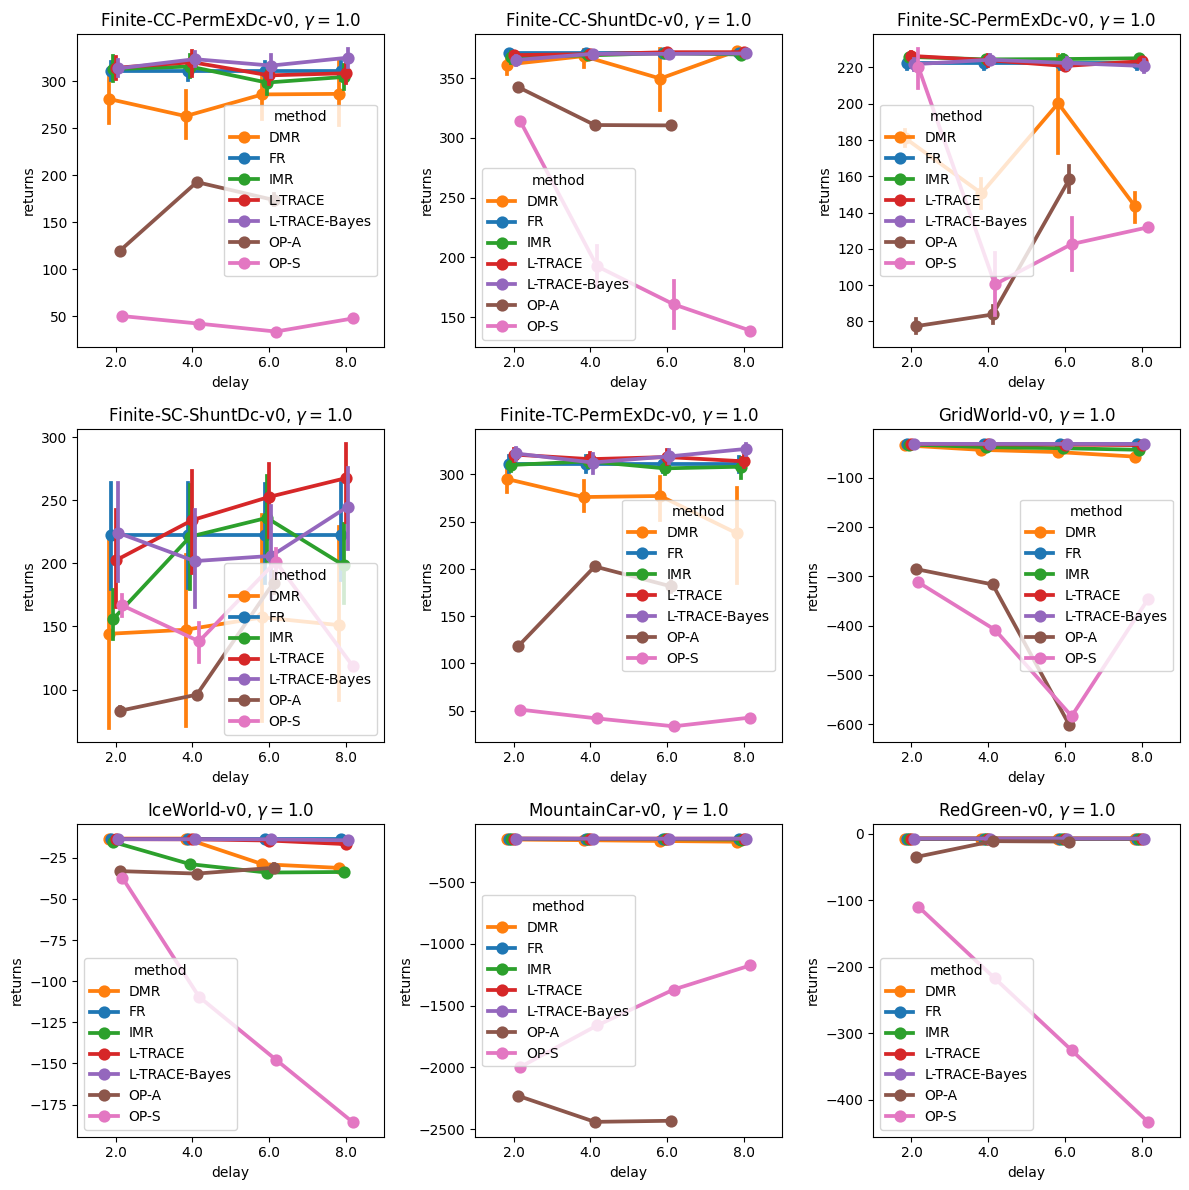

In [70]:
plot_return_ci(df_metrics, gamma=1.0, suffix="sarsa")

{'delay_type': 'fixed', 'delay_mu': 8.0}
{'delay_type': 'fixed', 'delay_mu': 4.0}
{'delay_type': 'fixed', 'delay_mu': 6.0}
{'delay_type': 'fixed', 'delay_mu': 2.0}


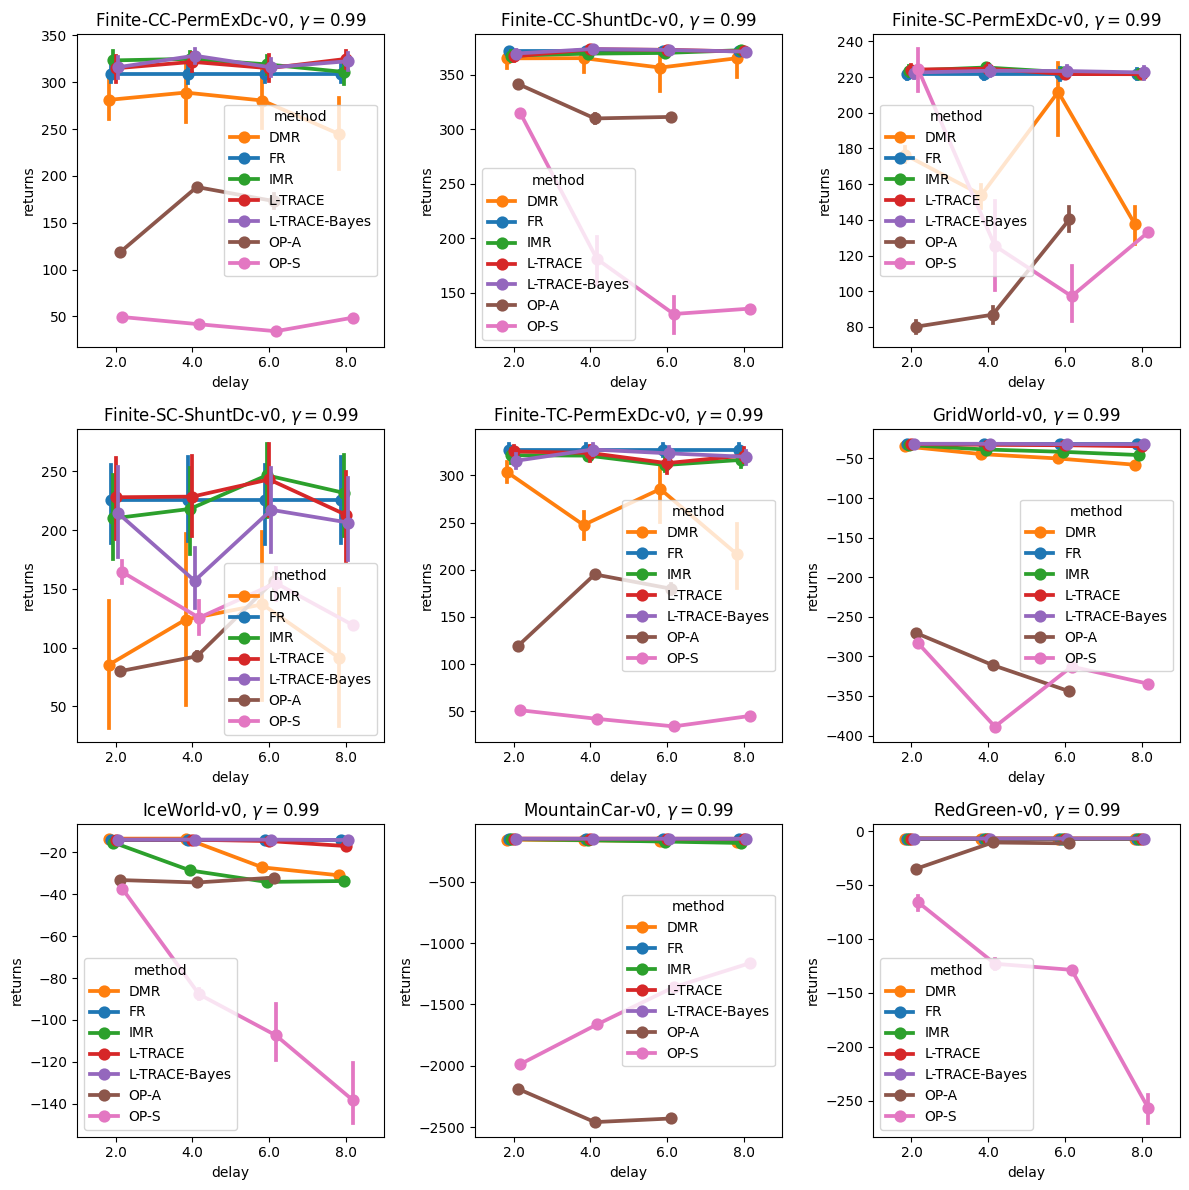

In [71]:
plot_return_ci(df_metrics, gamma=0.99, suffix="sarsa")

## Sample distributions

In [72]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = max_episode_filter(df_data)
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    methods = sorted(df_raw["method"].unique())
    
    fig, axes = plt.subplots(
        nrows=len(methods), ncols=num_samples, figsize=(4*num_samples, 4*len(methods)),
    )
    for row, method in enumerate(methods):
        df_algomethod = df_raw[
            (df_raw["method"] == method)
        ]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join([
                method,
                "$\mu$ =", str(miu),
            ])
            ax.set_title(title_template)

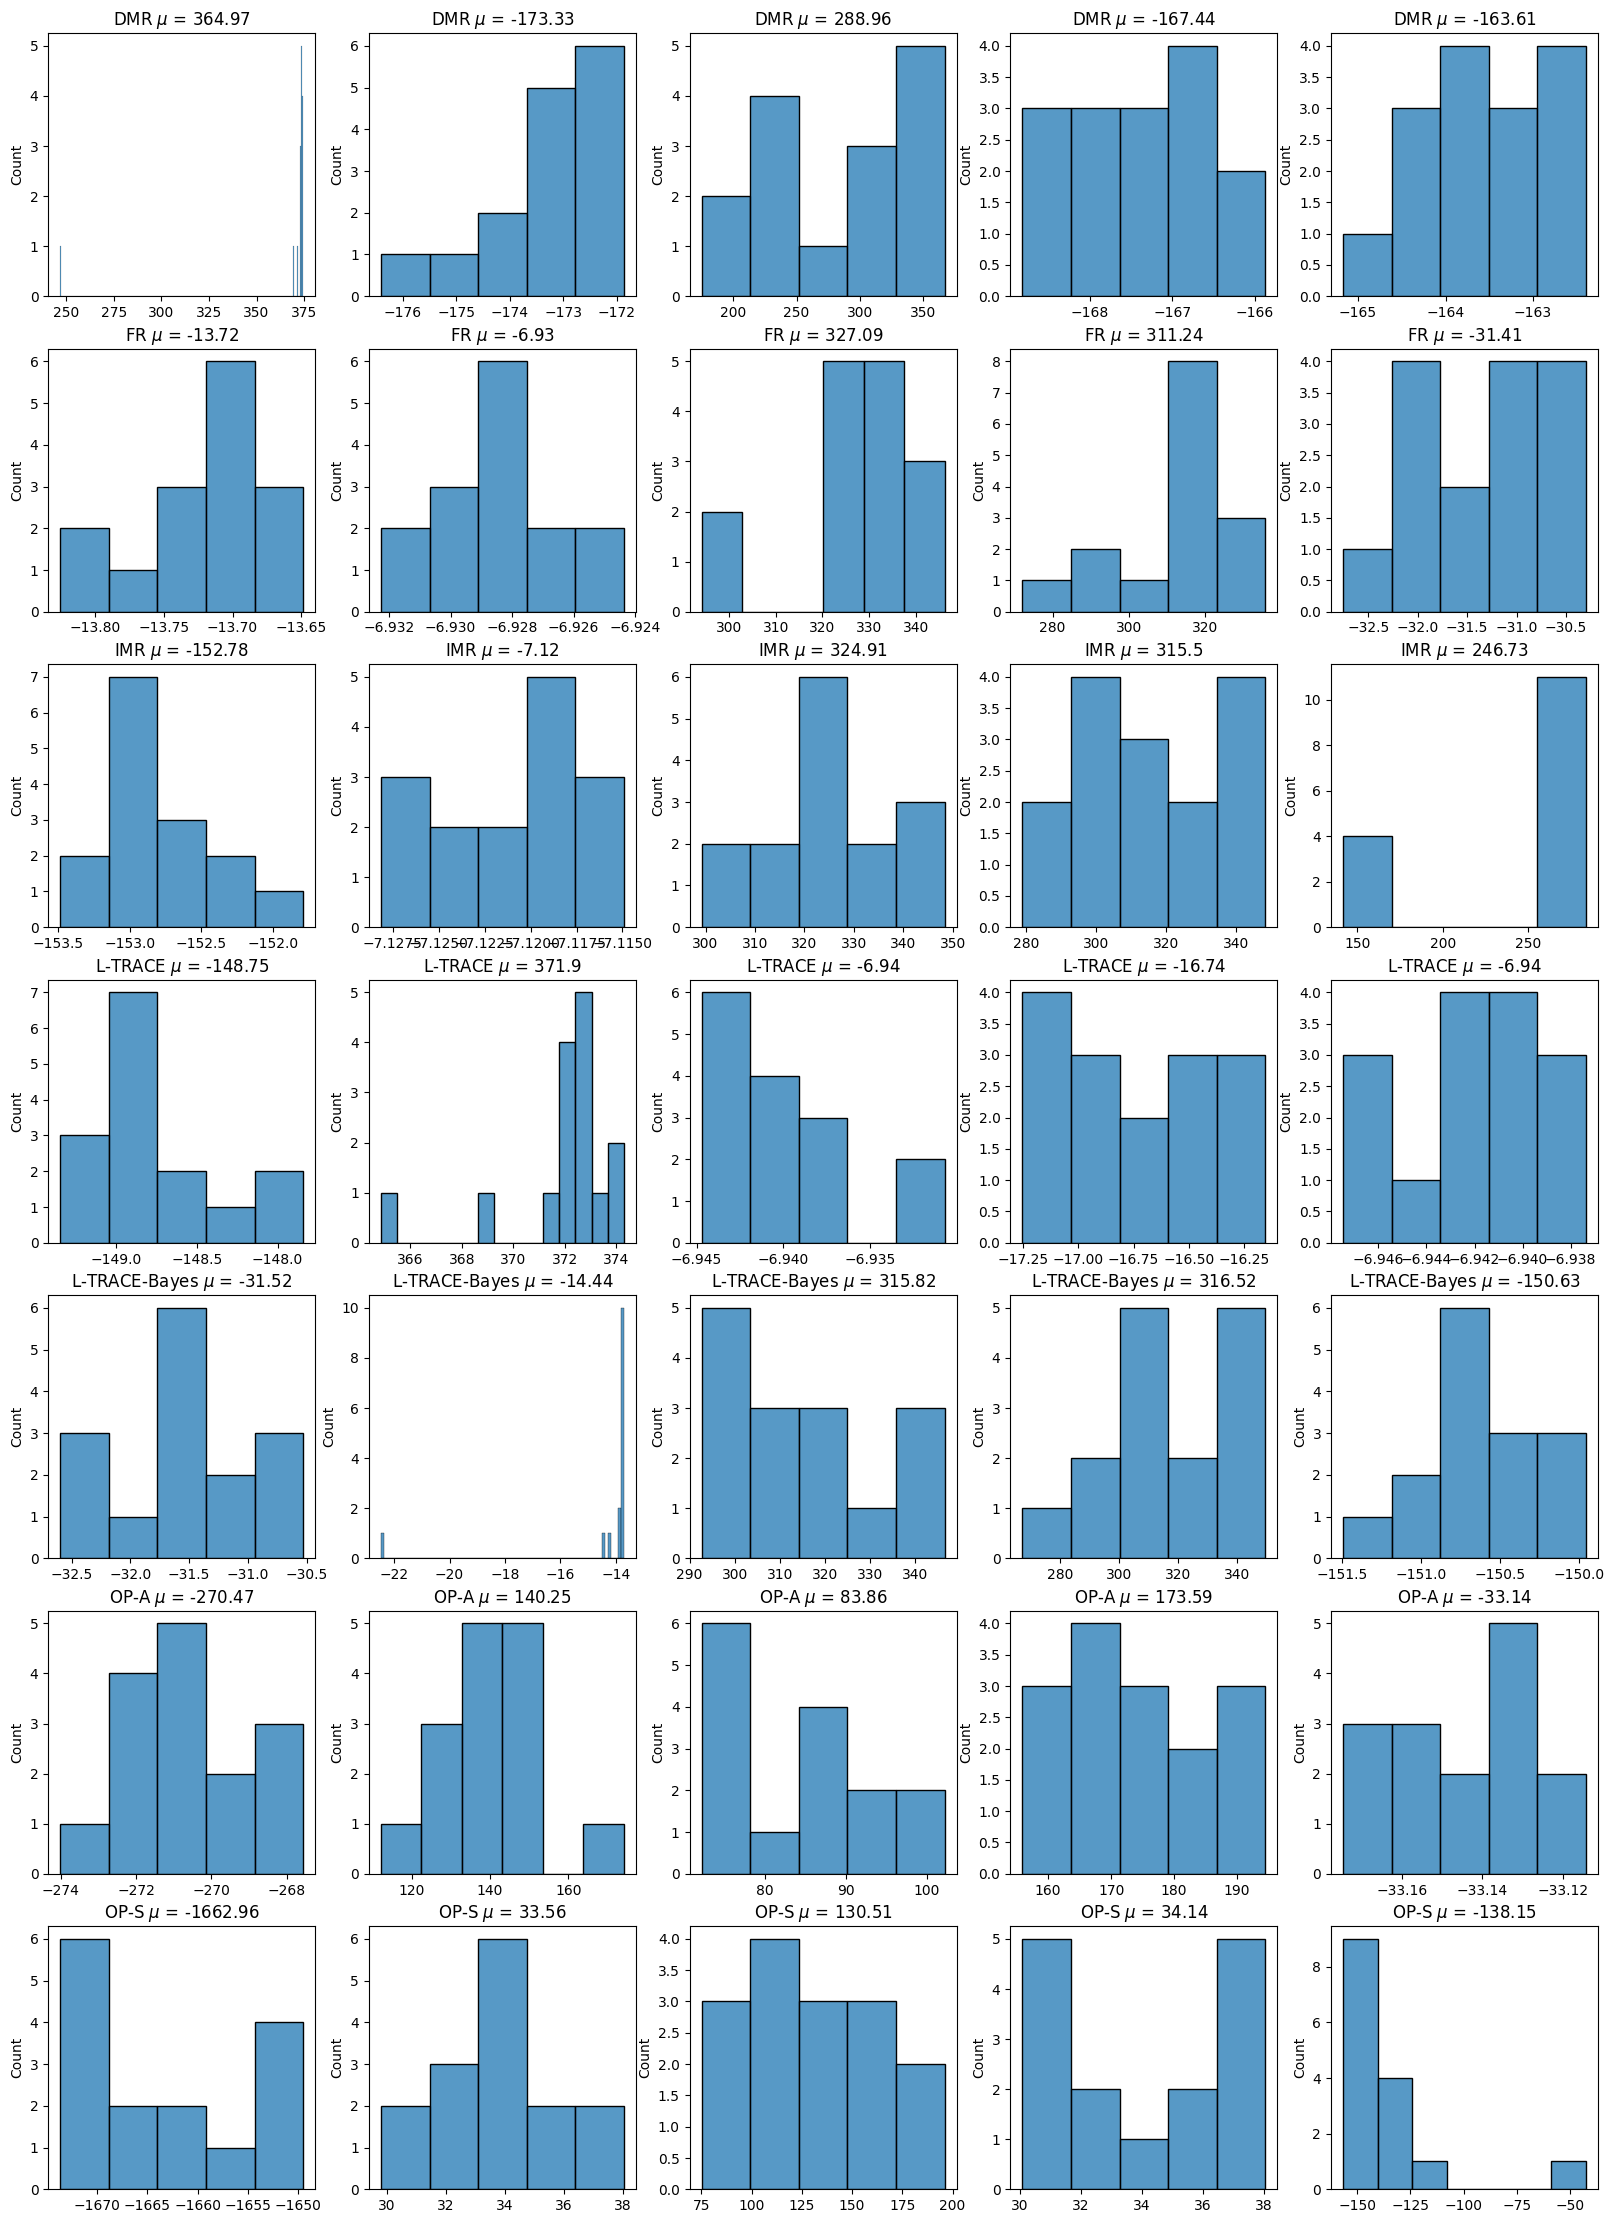

In [73]:
plot_sample_dist(df_metrics, 5)